## Collection_DS_takehome_challenges: Clustering Grocery Items

### Kanja Saha
### 08/07/2018

Company XYZ is an online grocery store. In the current version of the website, they have manually grouped the items into a few categories based on their experience. However, they now have a lot of data about user purchase history. Therefore, they would like to put the data into use! This is what they asked you to do: The company founder wants to meet with some of the best customers to go through a focus group with them. 

You are asked to send the ID of the following customers to the founder: 
- the customer who bought the most items overall in her lifetime 
- for each item, the customer who bought that product the most 
- Cluster items based on user co-purchase history. That is, create clusters of products that have the highest probability of being bought together. The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.



### Import Libraries & Data Load 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset into pandas dataframe
item_to_id = pd.read_csv("item_to_id.csv")
display ("Dataset has {} rows(samples) with {} columns(features) each.".format(*item_to_id.shape))

purchase_history = pd.read_csv("purchase_history.csv")

display ("Dataset has {} rows(samples) with {} columns(features) each.".format(*purchase_history.shape))

display ("Dataset has {} unique userids.".format(purchase_history.user_id.nunique()))

display (purchase_history.head(3))
display (item_to_id.head(3))


'Dataset has 48 rows(samples) with 2 columns(features) each.'

'Dataset has 39474 rows(samples) with 2 columns(features) each.'

'Dataset has 24885 unique userids.'

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"


,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38


### Question 1
Find the customer who bought the most items overall in her lifetime 


In [3]:
df= (purchase_history.drop('id', axis=1)
             .join
             (
             purchase_history.id
             .str
             .split(",")
             .apply(pd.Series, 1)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('Item_id') 
             .astype("Int64")
             ))



In [4]:
df1=df.groupby(['user_id']).apply(lambda x: pd.Series(dict(Item_Total=x.Item_id.count())))
df1.assign(rnk=df1['Item_Total'].rank(method='dense', ascending=False)).query('rnk==1')


,Item_Total,rnk
user_id,,
269335,72,1.0


## Question 2
For each item,find the customer who bought that product the most 


In [5]:
df.head()

,user_id,Item_id
0,222087,27
0,222087,26
1,1343649,6
1,1343649,47
1,1343649,17


In [6]:
print("for each item, the customer who bought that product the most")
df11=pd.merge(df, item_to_id, on='Item_id', how='inner')
df12=df11.groupby(['Item_name','user_id']).apply(lambda x: pd.Series(dict(Item_Total=x.Item_id.count())))
df12.assign(rnk=df12.groupby(['Item_name'])['Item_Total'].rank(method='dense', ascending=False)).query('rnk==1')


for each item, the customer who bought that product the most


Item_Total  rnk
Item_name     user_id                 
aluminum foil 143741            3  1.0
apples        109578            4  1.0
              384935            4  1.0
              545108            4  1.0
              1303742           4  1.0
              1310896           4  1.0
baby items    5289              3  1.0
              73071             3  1.0
              432842            3  1.0
bagels        653800            4  1.0
              820788            4  1.0
bananas       1218645           4  1.0
              1269111           4  1.0
beef          366155            4  1.0
              463073            4  1.0
              1089642           4  1.0
              1275324           4  1.0
berries       38872             4  1.0
              87247             4  1.0
              384935            4  1.0
              1217810           4  1.0
              1236029           4  1.0
              1493728           4  1.0
broccoli      31625             4  1.0
              250777            4  1.0
              268767            4  1.0
              297185            4  1.0
              1286028           4  1.0
butter        151926            3  1.0
              238761            3  1.0
...                           ...  ...
sugar         31625             4  1.0
              68836             4  1.0
              540483            4  1.0
              1091637           4  1.0
              1301034           4  1.0
tea           920002            5  1.0
toilet paper  1310207           3  1.0
              1425746           3  1.0
tortillas     305916            4  1.0
              375849            4  1.0
              557099            4  1.0
              1158937           4  1.0
              1341188           4  1.0
              1485538           4  1.0
waffles       217277            3  1.0
              397623            3  1.0
              414416            3  1.0
              1392068           3  1.0
yogurt        335841            3  1.0
              342220            3  1.0
              608263            3  1.0
              618914            3  1.0
              728584            3  1.0
              806978            3  1.0
              943163            3  1.0
              1167089           3  1.0
              1169085           3  1.0
              1213479           3  1.0
              1280108           3  1.0
              1329628           3  1.0

[280 rows x 2 columns]

### Question 3
Cluster items based on user co-purchase history. That is, create clusters of products that have the highest probability of being bought together. 


### Data Transformation

In [7]:
df2=purchase_history["id"].str.get_dummies(',').replace('',0)
df2.rename(inplace=True,columns=dict(zip(df2.columns, item_to_id["Item_name"])))
n_data=df2.corr()


## Model Implementations

I chose K-means as it works well with numerical variables and in lower dimensions. To compliment my finsing, I will also implement Hierarchical Clustering which really works well with correlation matrix.

### Kmeans

For K-means n_clusters = 2. The average silhouette_score is : 0.041661205678714015
For K-means n_clusters = 3. The average silhouette_score is : 0.051327271905582596
For K-means n_clusters = 4. The average silhouette_score is : 0.06353447573445599
For K-means n_clusters = 5. The average silhouette_score is : 0.0640802098701967
For K-means n_clusters = 6. The average silhouette_score is : 0.07883146018807412
For K-means n_clusters = 7. The average silhouette_score is : 0.09840876189985981
For K-means n_clusters = 8. The average silhouette_score is : 0.11069083390608951
For K-means n_clusters = 9. The average silhouette_score is : 0.1202685525277618
For K-means n_clusters = 10. The average silhouette_score is : 0.12718099937061586
For K-means n_clusters = 11. The average silhouette_score is : 0.13075741094730597
For K-means n_clusters = 12. The average silhouette_score is : 0.13709329800420839
For K-means n_clusters = 13. The average silhouette_score is : 0.13126191636650142
For K-means 

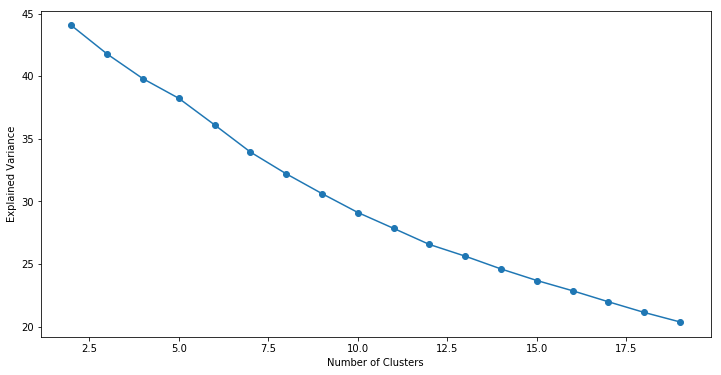

In [8]:
#Elbow method & silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Pretty display for notebooks
%matplotlib inline

cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(n_data)
    preds = clusters.predict(n_data)
    cluster_errors.append( clusters.inertia_ )
    score = silhouette_score(n_data, preds, metric='euclidean')
    print ("For K-means n_clusters = {}. The average silhouette_score is : {}".format(num_clusters, score))

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.ylabel('Explained Variance')
plt.xlabel('Number of Clusters')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Although there is no clear bent in the elbow, if you look at the silhoutte score around 12 to 14 cluster, the value seems to not change much at that range. So, I think 12 to 14 cluster may be considered optimal.

In [9]:
#Find cluster centers and size using Kmeans
# Loop through clusters
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)
if 'item' in n_data.columns:
    n_data.drop(['item'], axis = 1, inplace = True)

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = range(12,13)
for n_clusters in range_n_clusters:
    #Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(n_data)

    #Predict the cluster for each data point
    preds = clusterer.predict(n_data)
    
    #Predict the cluster for each transformed sample data point
    labels_kmeans=clusterer.labels_
    n_data['cluster']=labels_kmeans
n_data['item']=n_data.index
n_data.sort_values(by =['cluster', 'item'], inplace =True)

### Plotting Kmeans result with 12 clusters

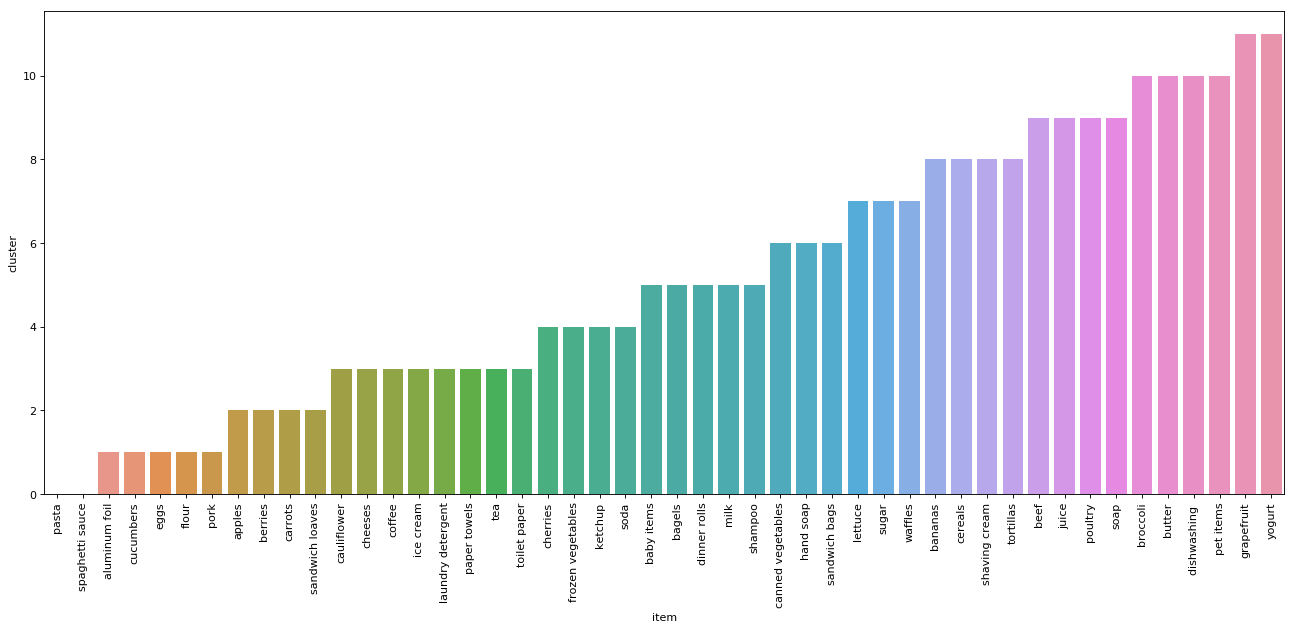

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8), dpi=80)
plt.xticks(rotation=90)
ax=sns.barplot(n_data['item'],n_data['cluster'])
plt.show()

### AgglomerativeClustering

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

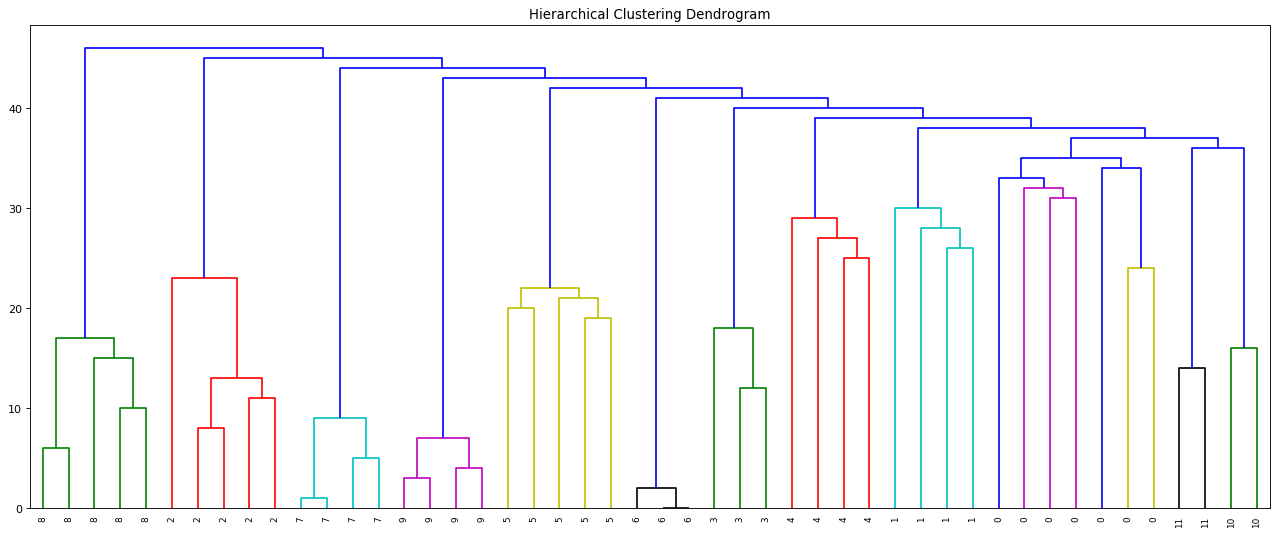

In [11]:
from sklearn.cluster import AgglomerativeClustering

if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)
if 'item' in n_data.columns:
    n_data.drop(['item'], axis = 1, inplace = True)

Hclustering = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
Hclustering.fit_predict(n_data)
labels_HC = Hclustering.labels_
n_data['cluster']=Hclustering.labels_
n_data['item']=n_data.index


from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    display(distance)

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    display(no_of_observations)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    #dendrogram(linkage_matrix, p=3, truncate_mode='level', **kwargs)
    dendrogram(linkage_matrix, p=30, truncate_mode='level', **kwargs)

plt.figure(figsize=(20, 8), dpi=80)
plt.xticks(rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(Hclustering, labels=Hclustering.labels_)
plt.show()

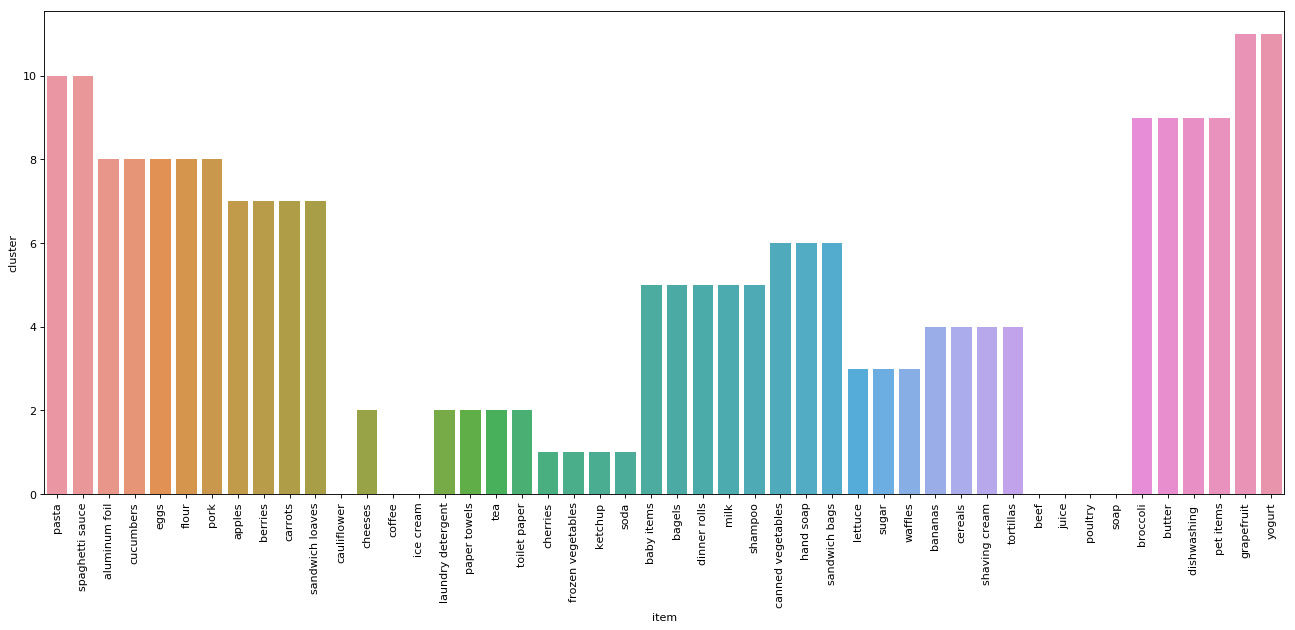

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8), dpi=80)
plt.xticks(rotation=90)
ax=sns.barplot(n_data['item'],n_data['cluster'])
plt.show()

### Conclusion

From the two above clustering results, the grocery items can be clustered into 12 groups.


In [13]:
p=pd.DataFrame(n_data.groupby(['cluster'])['item'].apply(list))
pd.set_option('display.max_colwidth', -1)
p.to_html

<bound method DataFrame.to_html of                                                                   item
cluster                                                               
0        [cauliflower, coffee, ice cream, beef, juice, poultry, soap] 
1        [cherries, frozen vegetables, ketchup, soda]                 
2        [cheeses, laundry detergent, paper towels, tea, toilet paper]
3        [lettuce, sugar, waffles]                                    
4        [bananas, cereals, shaving cream, tortillas]                 
5        [baby items, bagels, dinner rolls, milk, shampoo]            
6        [canned vegetables, hand soap, sandwich bags]                
7        [apples, berries, carrots, sandwich loaves]                  
8        [aluminum foil, cucumbers, eggs, flour, pork]                
9        [broccoli, butter, dishwashing , pet items]                  
10       [pasta, spaghetti sauce]                                     
11       [grapefruit, yogurt]             